<a href="https://colab.research.google.com/github/MarkLee7925/Gas-Turbine-Emissions/blob/main/GasTurbineEmissions_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gas Turbine Emissions - Deep Neural Network

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

## 2. Load and Summarize Data

In [2]:
# Load dataframe (df)
df = pd.read_csv('gt_2011-15.csv')
df = df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO',
       'NOX', 'TEY']]
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

print(X.shape, y.shape)

(36733, 10) (36733,)


In [3]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,11.898,0.32663,81.952,134.67
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,11.892,0.44784,82.377,134.67
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,12.042,0.45144,83.776,135.10
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,11.990,0.23107,82.505,135.03
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,11.910,0.26747,82.028,134.67
...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,10.411,10.99300,89.172,109.08
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,10.344,11.14400,88.849,108.79
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,10.462,11.41400,96.147,107.81
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,11.771,3.31340,64.738,131.41


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   CDP     36733 non-null  float64
 8   CO      36733 non-null  float64
 9   NOX     36733 non-null  float64
 10  TEY     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


In [5]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,12.060525,2.372468,65.293067,133.506404
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,1.088795,2.262672,11.678357,15.618634
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,9.851800,0.000388,25.905000,100.020000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,11.435000,1.182400,57.162000,124.450000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,11.965000,1.713500,63.849000,133.730000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,12.855000,2.842900,71.548000,144.080000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,15.159000,44.103000,119.910000,179.500000


In [6]:
# Check for missing values
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
TEY     0
dtype: int64

## 3. Data Preprocessing and Feature Engineering

In [7]:
# Split dataframe (df) into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [8]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## 4. Define DNN Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Additional Libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, RepeatedKFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 60)                660       
_________________________________________________________________
dense_13 (Dense)             (None, 50)                3050      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 51        
Total params: 3,761
Trainable params: 3,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
919/919 [==============================] - 1s 1ms/step - loss: 2853.2888 - val_loss: 156.6743
Epoch 2/100
919/919 [==============================] - 1s 1ms/step - loss: 99.8785 - val_loss: 62.5081
Epoch 3/100
919/919 [====================

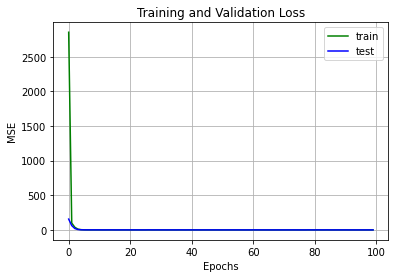

In [22]:
# Define model
reg = Sequential()

# Add layers
reg.add(Dense(units=60, activation='relu', input_dim=X.shape[1]))
reg.add(Dense(units=50, activation='relu'))
reg.add(Dropout(0.00015))

# reg.add(Dense(units=50, activation='relu'))
# reg.add(Dropout(0.0002))

reg.add(Dense(units=1))

# Compile model
reg.compile(optimizer='adam', loss='mse')

# Summarize model
reg.summary()

# Train model
history = reg.fit(X_train, y_train, batch_size=32, epochs=100, 
                  validation_data=(X_test, y_test))

# Plot loss during training
plt.plot(history.history['loss'], 'g', label='train')
plt.plot(history.history['val_loss'], 'b', label='test')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

In [23]:
# Predict test set results
y_pred = reg.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
print('')

# Summarize results
print('MAE: %.3f' % (mean_absolute_error(y_test, y_pred)))
print('MSE: %.3f' % (mean_squared_error(y_test, y_pred)))
print('RMSE: %.3f' % (mean_squared_error(y_test, y_pred, squared=False)))
print('R^2 Score: %.3f' % (r2_score(y_test, y_pred)))

[[126.57 126.81]
 [122.7  122.67]
 [151.28 152.8 ]
 ...
 [132.02 132.22]
 [132.94 132.83]
 [150.39 150.23]]

MAE: 0.539
MSE: 0.501
RMSE: 0.708
R^2 Score: 0.998


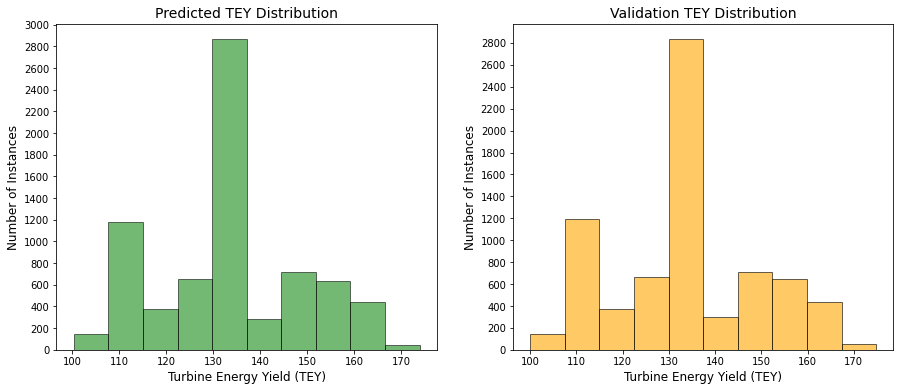

In [24]:
# Plot histogram for y_pred
fig1 = plt.figure(figsize=(15, 6))
ax1 = fig1.add_subplot(1, 2, 1)
plt.xticks(np.arange(50, 200, 10))
plt.yticks(np.arange(0, 3200, 200))
plt.hist(x=y_pred, facecolor='green', alpha=0.55, edgecolor='black')
plt.xlabel('Turbine Energy Yield (TEY)', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.title('Predicted TEY Distribution', fontsize=14)

# Plot histogram for y_test
ax1 = fig1.add_subplot(1, 2, 2)
plt.xticks(np.arange(50, 200, 10))
plt.yticks(np.arange(0, 3200, 200))
plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
plt.xlabel('Turbine Energy Yield (TEY)', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.title('Validation TEY Distribution', fontsize=14)

# Show subplot
plt.show()

## 5. Final Results

<table border = "1">
  <thead>
    <th colspan = "3">Sample Neural Network Regression Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE</b></td>
      <td>0.539</td>
    </tr>
    <tr>
      <td><b>MSE</b></td>
      <td>0.501</td>
    </tr>
    <tr>
      <td><b>RMSE</b></td>
      <td>0.708</td>
    </tr>
    <tr>
      <td><b>R^2</b></td>
      <td>0.998</td>
    </tr>
  </tbody>
</table>

Note: These results vary slightly due to the random nature of Deep Learning.